## Priprava podatkov, osnovne statistike in vizualizacija

Podatkovno rudarjenje, naloga, `23.02.2025` **`Eva Müller`**

Neizogiben del vsakega projekta na področju podatkovnega rudarjenja je iskanje,
urejanje in priprava podatkov. V tej nalogi boste spoznali primer podatkovne
zbirke in uporabili postopke za pretvorbo podatkov v ustrezno obliko ter pregled in
prikaz osnovnih statistik.

### Podatki

V nalogi boste pregledali in pripravili podatke gledanosti Hollywoodskih filmov
zbirke [MovieLens](https://grouplens.org/datasets/movielens/) v obdobju **1995-2016**.

Iste podatke boste uporabili v vseh nalogah, zato jih dodobra spoznajte. Gre za podatkovno zbirko za
vrednotenje priporočilnih sistemov, ki vsebuje gledalce ter njihove ocene za posamezni film na lestvici 1 do 5. 
Poleg osnovne matrike uporabnikov in ocen vsebuje še dodatne podatke o filmih (npr. žanr, datum, oznake,
igralci).

Podatki so v mapi `./podatki/ml-latest-small`. Podatkovna zbirka vsebuje naslednje datoteke:

* ratings.csv: podatki o uporabnikih in ocenah,
* movies.csv: podatki o žanrih filmov,
* cast.csv: podatki o igralcih,
* tags.csv: podatki o oznakah (ang. \emph{tags}),
* links.csv: povezave na sorodne podatkovne zbirke.


Pred pričetkom reševanja naloge si dobro oglejte podatke in datoteko **README.txt**. Podrobnosti o zbirki lahko preberete na [spletni strani](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Pripravite metode za nalaganje podatkov v ustrezne podatkovne strukture. Te vam bodo prišle
prav tudi pri nadaljnjih nalogah.
Bodite pozorni na velikost podatkov.

Zapišite kodo za branje datotek in pripravo ustreznih matrik (in drugih struktur) podatkov, ki jih boste uporabi pri odgovarjanju na spodnja vprašanja.

Kodo lahko razdelite v več celic.

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

cast = pd.read_csv( 'podatki/ml-latest-small/cast.csv')
ratings = pd.read_csv ('podatki/ml-latest-small/ratings.csv')
movies = pd.read_csv('podatki/ml-latest-small/movies.csv')
links = pd.read_csv ('podatki/ml-latest-small/links.csv')
tags = pd.read_csv('podatki/ml-latest-small/tags.csv')


### Vprašanja

Glavni namen podatkovnega rudarjenja je *odkrivanje znanj iz podatkov*,
torej odgovarjanje na vprašanja z uporabo računskih postopkov.

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne implementacija vaše rešitve.

#### 1. vprašanje (15%):
Kateri filmi so v povprečju najbolje ocenjeni?  Pripravite seznam
filmov ter njihovih povprečnih ocen in izpišite 10 filmov z vrha seznama.
Opazite pri takem ocenjevanju kakšno težavo? Kako bi jo lahko rešili? Kakšni so
rezultati tedaj?

Kodo lahko razdelite v več celic.

In [232]:
grupirano = ratings.groupby("movieId")
povp_ocene = grupirano["rating"].mean()
st_ocen = grupirano["rating"].count()
povprecne_ocene = pd.DataFrame({
    "povprecna_ocena": povp_ocene,
    "stevilo_ocen": st_ocen
})

print(povprecne_ocene.head())

         povprecna_ocena  stevilo_ocen
movieId                               
1               3.872470           247
2               3.401869           107
3               3.161017            59
4               2.384615            13
5               3.267857            56


In [233]:
filmi_ocene = movies.merge(povprecne_ocene, on="movieId")
print(movies_with_ratings.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  avg_rating  count  
0  Adventure|Animation|Children|Comedy|Fantasy    3.872470    247  
1                   Adventure|Children|Fantasy    3.401869    107  
2                               Comedy|Romance    3.161017     59  
3                         Comedy|Drama|Romance    2.384615     13  
4                                       Comedy    3.267857     56  


In [234]:
naj_filmi = filmi_ocene.sort_values(by="povprecna_ocena", ascending=False)
print(naj_filmi[["title", "povprecna_ocena", "stevilo_ocen"]].head(10))

                                                  title  povprecna_ocena  \
9065  The Beatles: Eight Days a Week - The Touring Y...              5.0   
7297                               Padre padrone (1977)              5.0   
6629                               Amazing Grace (2006)              5.0   
6662       Woman on the Beach (Haebyeonui yeoin) (2006)              5.0   
6704                                O Lucky Man! (1973)              5.0   
6717                                Dorian Blues (2004)              5.0   
6726           My Best Friend (Mon meilleur ami) (2006)              5.0   
6785  Edge of Heaven, The (Auf der anderen Seite) (2...              5.0   
6836                  Drained (O cheiro do Ralo) (2006)              5.0   
6843  To the Left of the Father (Lavoura Arcaica) (2...              5.0   

      stevilo_ocen  
9065             1  
7297             1  
6629             1  
6662             1  
6704             1  
6717             1  
6726            

Tu opazimo težavo, saj se filmi z le eno oceno 5.0 uvrščajo na vrh seznama, kar ne odraža njihove dejanske kakovosti. Njihova visoka uvrstitev je posledica majhnega števila ocen, kar lahko vodi do napačne interpretacije priljubljenosti in kakovosti filma.

Da bi zagotovili bolj realistične rezultate, je treba omejiti število ocen, ki jih mora imeti film, da ga upoštevamo pri analizi. Postavili bomo prag 50 ocen, kar pomeni, da bomo izločili filme z manj ocenami, saj njihove visoke ocene morda niso reprezentativne. To nam omogoča bolj zanesljiv seznam najbolje ocenjenih filmov.

In [197]:
filtrirano = naj_filmi[naj_filmi["stevilo_ocen"] >= 50]
print(filtrirano[["title", "povprecna_ocena", "stevilo_ocen"]].head(10))


                                 title  povprecna_ocena  stevilo_ocen
695              Godfather, The (1972)         4.487500           200
284   Shawshank Redemption, The (1994)         4.487138           311
786          African Queen, The (1951)         4.420000            50
734         Maltese Falcon, The (1941)         4.387097            62
977     Godfather: Part II, The (1974)         4.385185           135
48          Usual Suspects, The (1995)         4.370647           201
984                 Raging Bull (1980)         4.350000            50
1006                  Chinatown (1974)         4.335526            76
725                 Rear Window (1954)         4.315217            92
960                12 Angry Men (1957)         4.304054            74


Po uvedbi omejitve na vsaj 50 ocen so rezultati zdaj bistveno bolj realistični. Na vrhu seznama so filmi, ki niso le visoko ocenjeni, temveč imajo tudi zadostno število ocen, kar pomeni, da odražajo splošno mnenje gledalcev. S tem smo zmanjšali vpliv filmov z le nekaj ocenami, ki bi sicer izkrivili rezultate. Tako dobimo bolj zanesljiv vpogled v resnično najbolj priljubljene in cenjene filme.







#### 2. vprašanje (15%):
Posamezni film pripada enemu ali več žanrom. 
Koliko je vseh žanrov? Prikaži porazdelitev žanrov z uporabo ustrezne
vizualizacije.

Kodo lahko razdelite v več celic.

In [198]:
#v mnozico spravimo zanre, da so unikatni

zanri = set()
for vsi_zanri in movies["genres"]:
    for zanr in vsi_zanri.split("|"):
        zanri.add(zanr)
        
print("Skupno število različnih žanrov:", len(zanri))
print("Seznam vseh žanrov:", zanri)

Skupno število različnih žanrov: 20
Seznam vseh žanrov: {'Children', 'Documentary', 'Crime', 'Mystery', 'Adventure', 'Western', 'Drama', 'Fantasy', 'Romance', 'Musical', 'Animation', '(no genres listed)', 'War', 'Horror', 'Comedy', 'Film-Noir', 'Sci-Fi', 'IMAX', 'Thriller', 'Action'}


Skupno število različnih žanrov v podatkovni zbirki je 19, pri čemer ne upoštevamo filmov, ki nimajo določenega žanra. Spodaj je še stolpčni prikaz filmov in kako so porazdeljeni po žanrih.

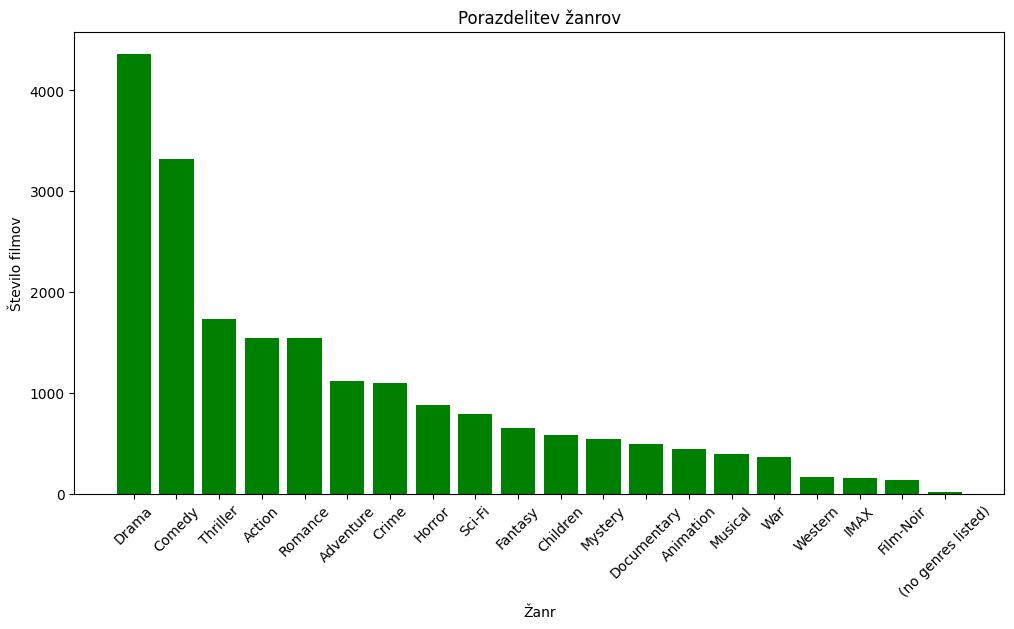

In [213]:
#seznam filmov in zanrov, prestejemo pojavitve
sez_zanrov = [zanr for vsi_zanri in movies["genres"] for zanr in vsi_zanri.split("|")]

pojavitve = pd.Series(sez_zanrov).value_counts()

plt.figure(figsize=(12, 6))
plt.bar(pojavitve.index, pojavitve.values, color="green")
plt.xlabel("Žanr")
plt.ylabel("Število filmov")
plt.title("Porazdelitev žanrov")
plt.xticks(rotation=45)
plt.show();

#### 3. vprašanje (20%):
Število ocen (ogledov) se za posamezni film razlikuje. Ali
obstaja povezava med gledanostjo in povprečno oceno filma? Opišite postopek, ki
ste ga uporabili pri odgovarjanju na vprašanje.

Kodo lahko razdelite v več celic.

         povprecna_ocena  stevilo_ocen
movieId                               
1               3.872470           247
2               3.401869           107
3               3.161017            59
4               2.384615            13
5               3.267857            56


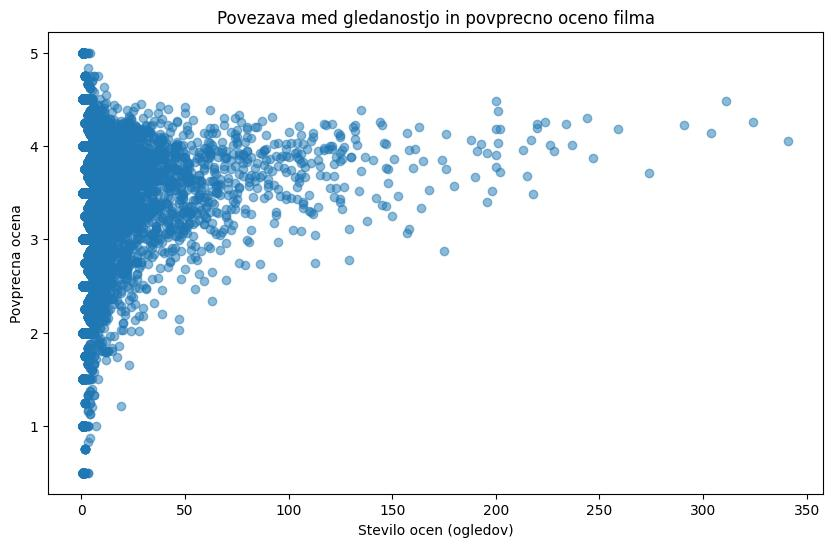

Pearsonov koeficient korelacije: 0.13082726621823262


In [230]:
podatki = povprecne_ocene.copy()
print(podatki.head())

plt.figure(figsize=(10, 6))
plt.scatter(podatki["stevilo_ocen"], podatki["povprecna_ocena"], alpha=0.5)

plt.xlabel("Stevilo ocen (ogledov)")
plt.ylabel("Povprecna ocena")
plt.title("Povezava med gledanostjo in povprecno oceno filma")
plt.show()

korelacija = podatki["stevilo_ocen"].corr(podatki["povprecna_ocena"])
print("Pearsonov koeficient korelacije:", korelacija)


Najprej smo izracunali povprecne ocene filmov in stevilo ocen za vsak film. Nato smo narisali scatter plot, kjer smo na x-os dali stevilo ocen, na y-os pa povprecno oceno, da bi videli, ali obstaja povezava. Za bolj natancen rezultat smo izracunali Pearsonov korelacijski koeficient. Ce je blizu 1, to pomeni, da imajo bolj gledani filmi visje ocene. Ce je blizu 0, ni povezave med gledanostjo in oceno. Ce je negativen, to pomeni, da bolj gledani filmi pogosto dobijo nizje ocene. To nam pomaga razumeti, ali gledanost vpliva na povprecno oceno in ali obstaja kaksen vzorec v podatkih.

#### 4. vprašanje (30%):
Vsaka ocena je bila vnešena na določen datum (stolpec
*timestamp*).  Ali se popularnost posameznih filmov s časom spreminja?
Problem reši tako, da za dani film ocene razporediš po času ter v vsaku časovni
točki izračunaš povprečje za zadnjih 30, 50, ali 100 ocen. Nariši graf, kako se
ocena spreminja in ga prikaži za dva zanimiva primera filmov.

Kodo lahko razdelite v več celic.

In [236]:
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"], unit="s")
print(ratings.head())


   userId  movieId  rating           timestamp
0       1       31     2.5 2009-12-14 02:52:24
1       1     1029     3.0 2009-12-14 02:52:59
2       1     1061     3.0 2009-12-14 02:53:02
3       1     1129     2.0 2009-12-14 02:53:05
4       1     1172     4.0 2009-12-14 02:53:25


In [245]:
film_id = 1
film_ocene = ratings[ratings["movieId"] == film_id].sort_values("timestamp")

film_ocene["30"] = film_ocene["rating"].rolling(window=30).mean()
film_ocene["50"] = film_ocene["rating"].rolling(window=50).mean()
film_ocene["100"] = film_ocene["rating"].rolling(window=100).mean()

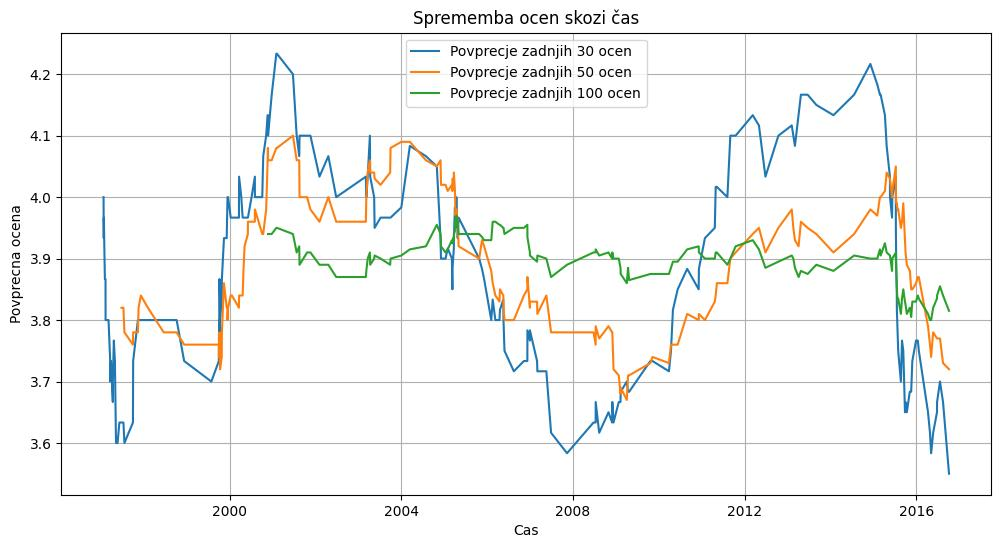

In [249]:
plt.figure(figsize=(12, 6))

plt.plot(film_ocene["timestamp"], film_ocene["30"], label="Povprecje zadnjih 30 ocen")
plt.plot(film_ocene["timestamp"], film_ocene["50"], label="Povprecje zadnjih 50 ocen")
plt.plot(film_ocene["timestamp"], film_ocene["100"], label="Povprecje zadnjih 100 ocen")

plt.xlabel("Cas")
plt.ylabel("Povprecna ocena")
plt.title("Sprememba ocen skozi čas")
plt.legend()
plt.grid()
plt.show()

Za ugotavljanje, ali se popularnost filma spreminja skozi cas, smo analizirali ocene filmov glede na datum vnosa. Najprej smo podatke uredili po casu, nato pa za vsak film izracunali tekoce povprecje zadnjih 30, 50 in 100 ocen. Tako smo dobili bolj gladko krivuljo, ki prikazuje, kako so se ocene spreminjale. Ce se krivulja dviga, to pomeni, da je film s casom pridobil boljse ocene. Ce pada, so se ocene z leti slabšale. Ce ostaja stabilna, to pomeni, da film skozi cas ohranja podobno oceno. Ta analiza nam pomaga razumeti, kako se mnenje gledalcev spreminja skozi leta.









Odgovor: **zapišite utemeljitev odgovora**

#### 5. vprašanje (20%):
Kako bi ocenili popularnost posameznih igralcev? Opišite postopek
ocenitve ter izpišite 10 najbolj popularnih igralcev.

Kodo lahko razdelite v več celic.

Za oceno popularnosti igralcev smo najprej povezali podatke o igralcih in filmih, v katerih so igrali, nato pa dodali podatke o ocenah teh filmov. Izracunali smo povprecno stevilo ocen filmov za vsakega igralca, povprecno oceno filmov, v katerih so nastopali, in kombinirano metriko, ki uposteva obe vrednosti. Ce igralec igra v filmih z veliko ocenami, pomeni, da je bolj znan in gledan. Ce so njegovi filmi visoko ocenjeni, to pomeni, da nastopa v kvalitetnih filmih. S kombinacijo teh dveh metrik smo dobili bolj realno lestvico najbolj popularnih igralcev.

#### Bonus vprašanje (5%):

Kateri je tvoj najljubši film? Zakaj?

Moj najljubši film je The Lord of the Rings trilogija, a če bi morala izbrati samo enega, bi bil to The Fellowship of the Ring. Ta film postavi temelje celotne zgodbe in me vsakič znova popolnoma potegne vase s svojo čarobnostjo, pustolovščino in epskim svetom Srednjega sveta.



### Zapiski
Za nalaganje podatkov lahko uporabite modul `csv`.

In [18]:
from csv import DictReader

reader = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

Podatki v zadnji vrstici datoteke:

In [19]:
user, movie, rating, timestamp

('671', '6565', '3.5', '1074784724')

Pretvorba časovnega formata (*Unix time*). Kode za oblikovanje so navedene v dokumentaciji modula [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [173]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts

'2008-08-05 02:56'